# **Project: Advance Lane Finding** 

In this project, the goal is to write a software pipeline to identify the lane boundaries in video from a front-facing camera on a car.The camera calibration images, test road images, and videos are available in this repository. Your job is to take what you've learned in this lesson and write a great lane-finding pipeline!  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images).
For this project, you need to complete the following steps:

First, compute the camera calibration matrix and distortion coefficients given a set of chessboard images (in the camera_cal folder in the repository).

Next, for a series of test images (in the test_images folder in the repository):

    - Apply the distortion correction to the raw image.
    - Use color transforms, gradients, etc., to create a thresholded binary image.
    - Apply a perspective transform to rectify binary image ("birds-eye view").
    - Detect lane pixels and fit to find lane boundary.
    - Determine curvature of the lane and vehicle position with respect to center.
    - Warp the detected lane boundaries back onto the original image.
    - Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

Once you have implemented a successful pipeline on the test images, you will run your algorithm on a video. In the case of the video, you must search for the lane lines in the first few frames, and, once you have a high-confidence detection, use that information to track the position and curvature of the lines from frame to frame.

In [2]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import re
import glob
%matplotlib inline
print('Import Complete!')

Import Complete!


### Camera Calibration

Find and Draw Chessboard corners.

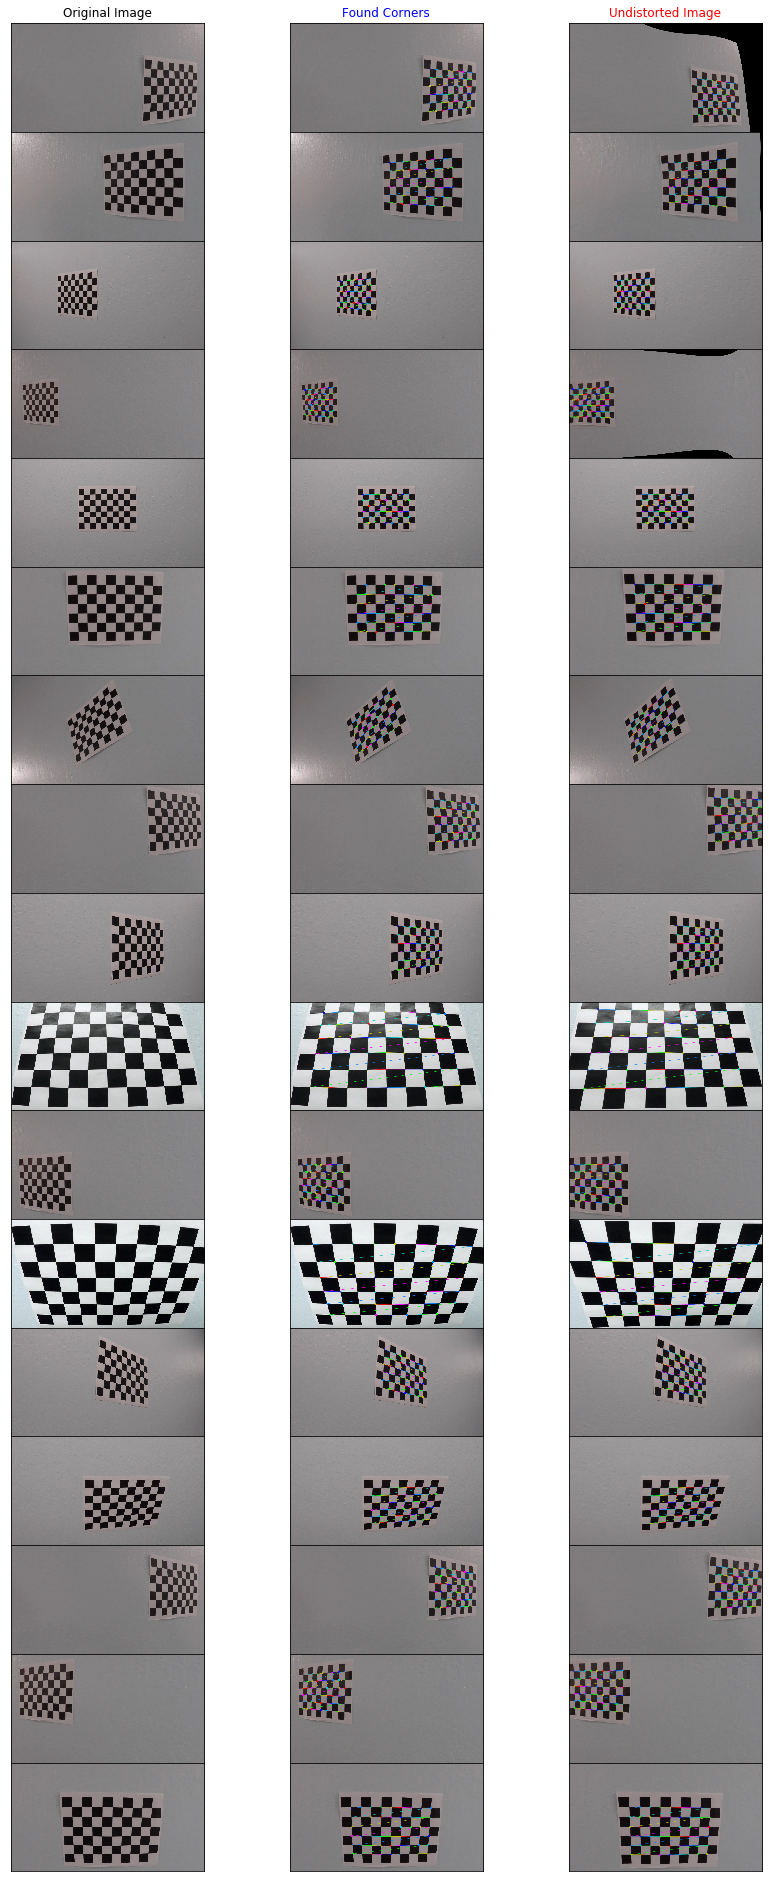

In [4]:
# These Arrays will be used to store object and image points
objpts = [] # 3D points in realworld Space
imgpts = [] # 2D points in Image space


# Prepare np(numpy) array for points like (0,0,0), (1,0,0),(1,1,0),....(7,5,0)
objp = np.zeros((6*9,3), np.float32)

# Lets use np's mgrig to initialize the array

objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) # T is for Transpose

# Making the list of files
images = os.listdir('camera_cal')
# print(images) # Just to verify what has been added to images

#Setup Plot
fig = plt.figure(figsize=(15,len(images)*2))
w_ratios = [1 for n in range(3)]
h_ratios = [1 for n in range(len(images))]
grid = gridspec.GridSpec(len(images), 3, wspace= 0, hspace= 0 , width_ratios= w_ratios, height_ratios= h_ratios)
i =0

# Loop through images and find chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread('camera_cal/'+fname)
    img_cp = np.copy(img)
    img_size = (img.shape[1],img.shape[0])
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    # Find Chessboard Corners
    ret,corners = cv2.findChessboardCorners(gray,(9,6),None)
    # print("corners: ", corners.shape, "\n", corners)
    # If found, append arrays for obj and img pts
    if ret == True:
        imgpts.append(corners)
        objpts.append(objp)
        
        # Draw corners, Undistort images and save images in a Premade Folder
        cv2.drawChessboardCorners(img_cp,(corners.shape[1],corners.shape[0]),corners,ret) 
        
        #Camera Calibration
        ret,mtx,dist,rvecs,tvecs = cv2.calibrateCamera(objpts, imgpts, img_size,None,None)
        
        # Undistort Images
        img_undistort = cv2.undistort(img_cp, mtx, dist, None, mtx)
        
        # next image
        ax = plt.Subplot(fig, grid[i])
        ax.imshow(img)
        if i==0:
            ax.set_title('Original Image', color = 'black' )
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        i += 1
        ax = plt.Subplot(fig, grid[i])
        ax.imshow(img_cp)
        if i==1:
            ax.set_title('Found Corners', color = 'blue' )
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        i += 1
        ax = plt.Subplot(fig, grid[i])
        ax.imshow(img_undistort)
        if i==2:
            ax.set_title('Undistorted Image', color = 'red' )
        ax.set_xticks([])
        ax.set_yticks([])
        fig.add_subplot(ax)
        i += 1
       #plt.imsave('./output_images/ChessboardCorners/FoundCorners/'+fname,img_cp)
       #plt.imsave('./output_images/ChessboardCorners/Undistorted/'+fname,img_undistort)
       #fig.savefig('output_images/ChessboardCorners/ChessboardCorners_Draw_Undistort.jpg')

  #  else:
  #      # next image
  #      ax = plt.Subplot(fig, grid[i])
  #      ax.set_title('Corners Not Found! %s'%(fname))
  #      ax.set_xticks([])
  #      ax.set_yticks([])
  #      fig.add_subplot(ax)
  #      i += 3
#print("corners: ", corners.shape, "\n", corners)
plt.show()

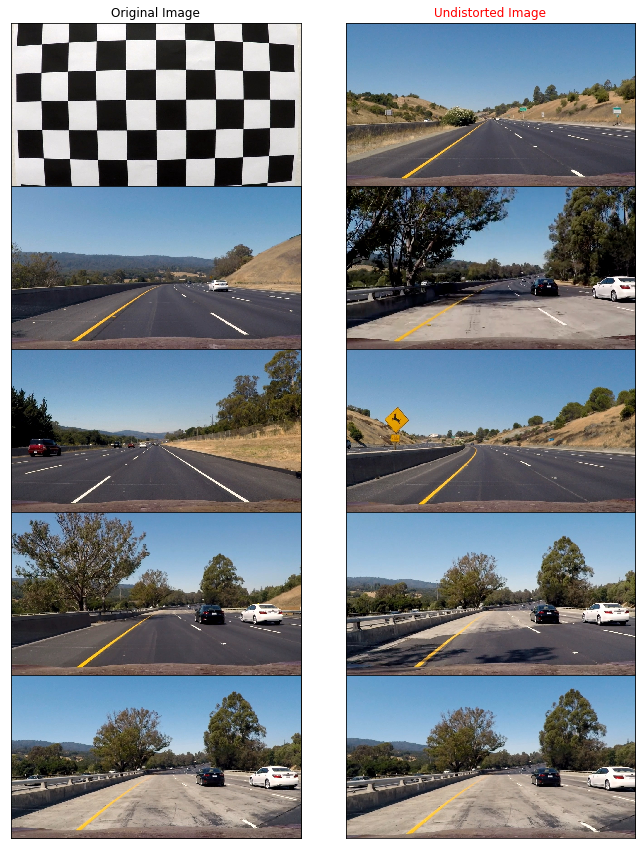

In [39]:
def undistort(img):
    return cv2.undistort(img, mtx, dist, None, mtx)
    
# Make a list of test images
#filepath = "test_images"
images = os.listdir('test_images')
#print(images[1])
# Setup plot
fig = plt.figure(figsize=(12, len(images)*3))
w_ratios = [1 for n in range(2)]
h_ratios = [1 for n in range(len(images))]
grid = gridspec.GridSpec(len(images), 2, wspace=0.0, hspace=0.0, width_ratios=w_ratios, height_ratios=h_ratios)
i = 0

# loop through and display test images and undististort them
for i, fname in enumerate(images):
    #print('test_images/'+fname)
    img = cv2.imread(filepath+'/'+fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_size = (img.shape[1], img.shape[0])
        
    # process image
    img2 = undistort(img)
        
    # next image
    ax = plt.Subplot(fig, grid[i])
    ax.imshow(img)
    if i==0:
        ax.set_title('Original Image')
    ax.set_xticks([])
    ax.set_yticks([])
    fig.add_subplot(ax)
    i += 1
    ax = plt.Subplot(fig, grid[i])
    ax.imshow(img2)
    if i==1:
        ax.set_title('Undistorted Image', color = 'r')
    ax.set_xticks([])
    ax.set_yticks([])
    fig.add_subplot(ax)
    i += 1
    plt.imsave('./output_images/Undistorted/'+fname,img2)
        
plt.show()

In [9]:
# print calibration matrix and distortion coefficients 
print('The Calibration Matrix is:\n {},\n\n Distortion Coefficients are:\n {}'.format(mtx, dist))

The Calibration Matrix is:
 [[1.15777942e+03 0.00000000e+00 6.67111050e+02]
 [0.00000000e+00 1.15282305e+03 3.86129068e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]],

 Distortion Coefficients are:
 [[-0.24688833 -0.02372817 -0.00109843  0.00035105 -0.00259134]]
